In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv
/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_zipcode_population.csv
/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_data_dictionary.csv
/kaggle/input/thankas/Thankas.gif


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#warnings
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv(r'/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv')

In [4]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [6]:
df['Total Long Distance Charges']

0       381.51
1        96.21
2       134.60
3       361.66
4        22.14
         ...  
7038    606.84
7039    356.40
7040     37.24
7041    142.04
7042      0.00
Name: Total Long Distance Charges, Length: 7043, dtype: float64

In [7]:
# Customer ID --------0                     0%
# Gender -------------1 النوع
# Age-----------------1العمر
# Married ------------1الحاله
# Number of Dependents 1 عدد الابناء او الاشخاص التي يعولها
# City ---------------1المدينه التي يقيم بيها
# Number of Referrals-1 عدد تريشحات العميل الي الاشخاص الاخرين لاستخدم نفس الشبكه والتعامل مع الشركة 
# Tenure in Months----1تعني فترة الوقت التي بقي فيها العميل متصلاً بخدمة الاتصالات الخاصة بالشركة. ويتم قياسها بالأشهر، حيث يتم تسجيل عدد الأشهر التي استخدم فيها العميل خدمات الاتصالات المقدمة من شركة الاتصالات
# Offer --------------1 العرض اللي شخص عليه 
# Phone Service-------خدمة الاتصال موجوده ام لا وهذيه الخدمه التي نستخدمها يوميا 
# Avg Monthly Long Distance Charges---1  متوسط المبلغ الذي يتم دفعه شهريا في المكالمات الدوليه ويختلف علي حسب البلد المتصل الي والمتصل ومدة المكالمة، ونوع خطة الاتصالات التي يستخدمها المستخدم، وعدد المكالمات التي يتم القيام بها كل شهر.
# Multiple Lines --1 تتيح للمستخدمين الحصول على أكثر من خط اتصال في نفس الحساب 
# Internet Service ---1 Internet Service
# Internet Type ------1 نوع خدمة الانترنت 
# Avg Monthly GB Download-----1 متوسط حجم التنزيل بالجيجابايت شهريًا
# Online Security ----------1 "الأمان عبر الإنترنت "Online Security" هو مجموعة من الإجراءات والتقنيات التي تهدف إلى حماية الأفراد والمؤسسات من التهديدات والمخاطر التي قد تواجههم أثناء استخدام الإنترنت.
# Online Backup ------ 1 "النسخ الاحتياطي عبر الإنترنت" أو "Online Backup" هو خدمة تتيح للمستخدمين الاحتفاظ بنسخة احتياطية من ملفاتهم وبياناتهم على الإنترنت.
# Device Protection Plan-----0 "خطة حماية الجهاز" أو "Device Protection Plan" هي خدمة تقدمها بعض الشركات والمتاجر التي تهدف إلى حماية أجهزة العملاء من الأضرار الناتجة عن الحوادث والأعطال والتلف.
# Premium Tech Support--1 "الدعم التقني المميز" أو "Premium Tech Support" هي خدمة توفرها بعض الشركات والمشغلين للأفراد والشركات لتوفير الدعم الفني والتقني المتخصص للأجهزة والبرامج والشبكات.
# Streaming TV-----1 هي المستخدم بيشغل النت علي الشاشه ودي من اهم الحاجات 
# Streaming Movies----1 المستخدم بيستخدم النت  في ان يسمع افلام ام لا 
# Streaming Music------1 المستخدم بيستخدم النت  في ان يسمع اغاني ام لا 
# Unlimited Data------1 "البيانات غير المحدودة" أو "Unlimited Data" هي خدمة توفرها بعض شركات الاتصالات ومزودي خدمة الإنترنت للمستخدمين، وتتيح للمستخدمين استخدام الإنترنت وتنزيل الملفات والتطبيقات ومشاهدة الفيديوهات والتدفق الصوتي بدون حدود أو قيود على كمية البيانات التي يمكن استخدامها. 
# Contract----1 العقد ما بين المستخدم  و الشركه ةعادة بيكون شهر بشهر 
# Paperless Billing ----1 الفاتور الالكترونية 
# Payment Method------------1 طرق الدفع 
# Monthly Charge----- الملبغ شهريا
# Total Refunds------ المبلغ المستردة للعميل في حالة الغاء الخدمة وما الي ذلك 
# Total Extra Data Charges---0 "إجمالي رسوم البيانات الإضافية" أو "Total Extra Data Charges" refers to the total amount charged to a customer for exceeding the data usage limit specified in their monthly internet or communication plan
# Total Long Distance Charges ---1 "إجمالي رسوم المكالمات البعيدة" أو "Total Long Distance Charges" هو المبلغ الإجمالي الذي يتم تحصيله من العميل عند إجراء مكالمات هاتفية خارج منطقة التغطية الخاصة بالخط الهاتفي الخاص به
# Total Revenue----1 "إجمالي الإيرادات" أو "Total Revenue" هو المبلغ الإجمالي للأموال التي تم جمعها من أي نشاط تجاري أو مالي
# Customer Status-----------------------------------------1 "حالة العميل" أو "Customer Status" هي الوصف الذي يحدد مدى رضا العميل عن الخدمة أو المنتج المقدم من قبل شركة أو مزود خدمة. 
# Churn Category--------------1 "فئة الانتقال" أو "Churn Category" هي فئة تصنف بها العملاء الذين ينتقلون من خدمة أو منتج مقدم من شركة إلى منتج أو خدمة مقدمة من منافسين.
# Churn Reason سبب انتقال العميل من خدمة الي خدمتنا

In [8]:
df.shape

(7043, 38)

In [9]:
df.head(1)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.3,0.0,0,381.51,974.81,Stayed,NaN,NaN


In [10]:
df['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

In [11]:
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [12]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [13]:
((df.isnull().sum())/(df.shape[0]) )*100

Customer ID                           0.000000
Gender                                0.000000
Age                                   0.000000
Married                               0.000000
Number of Dependents                  0.000000
City                                  0.000000
Zip Code                              0.000000
Latitude                              0.000000
Longitude                             0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                 0.000000
Phone Service                         0.000000
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
Internet Service                      0.000000
Internet Type                        21.666903
Avg Monthly GB Download              21.666903
Online Security                      21.666903
Online Backup                        21.666903
Device Protection Plan               21.666903
Premium Tech 

# Frist step in Cleaning

In [14]:
df = df.drop(['Churn Category', 'Churn Reason'], axis=1)

In [15]:
df = df.drop(['Customer ID'], axis=1)

# Second  step in Cleaning

In [16]:
# df['Avg Monthly Long Distance Charges','Avg Monthly GB Download']

In [17]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)
df=df.fillna(method='ffill').fillna(method='bfill')

In [18]:
# remove outlier 
df=df[df['Monthly Charge']>0]

In [19]:
df=df[df['Customer Status']!='Joined']

In [20]:
df.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                 

In [21]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000,6475.000000
mean,46.734981,0.475676,93497.991815,36.206155,-119.762452,2.020386,34.557066,25.407997,26.268108,66.272008,2437.345103,2.058703,7.183012,799.286948,3241.756360
std,16.838083,0.967411,1856.295883,2.473588,2.157355,3.020610,23.959012,14.210114,19.585221,29.917730,2267.655892,8.085483,25.824131,854.561590,2856.646045
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,18.250000,18.850000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,0.000000,92106.500000,33.990085,-121.799917,0.000000,12.000000,13.040000,13.000000,40.575000,548.300000,0.000000,0.000000,107.040000,836.300000
50%,46.000000,0.000000,93529.000000,36.276880,-119.631072,0.000000,32.000000,25.540000,21.000000,72.900000,1565.700000,0.000000,0.000000,471.750000,2388.330000
75%,60.000000,0.000000,95335.000000,38.184748,-117.967399,3.000000,57.000000,37.650000,30.000000,90.600000,4011.600000,0.000000,0.000000,1283.715000,5116.720000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [22]:
df.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status'],
      dtype='object')

# Data Vislitation

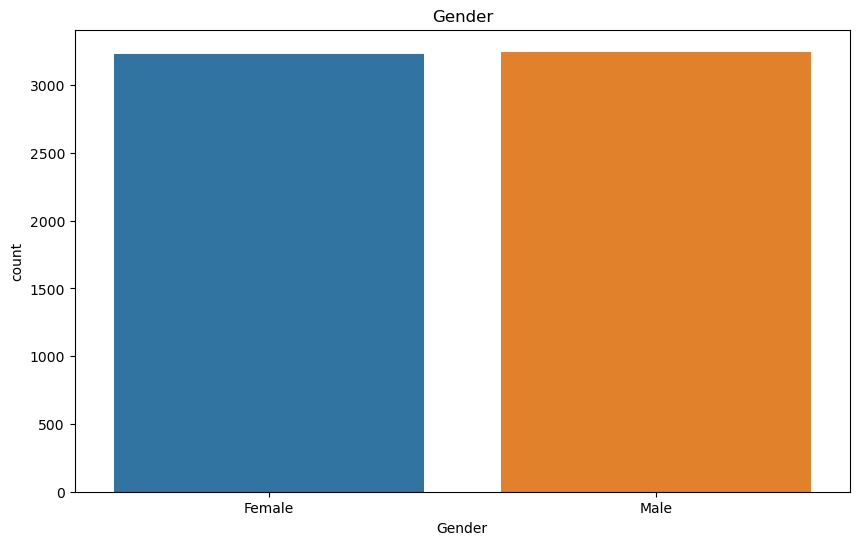

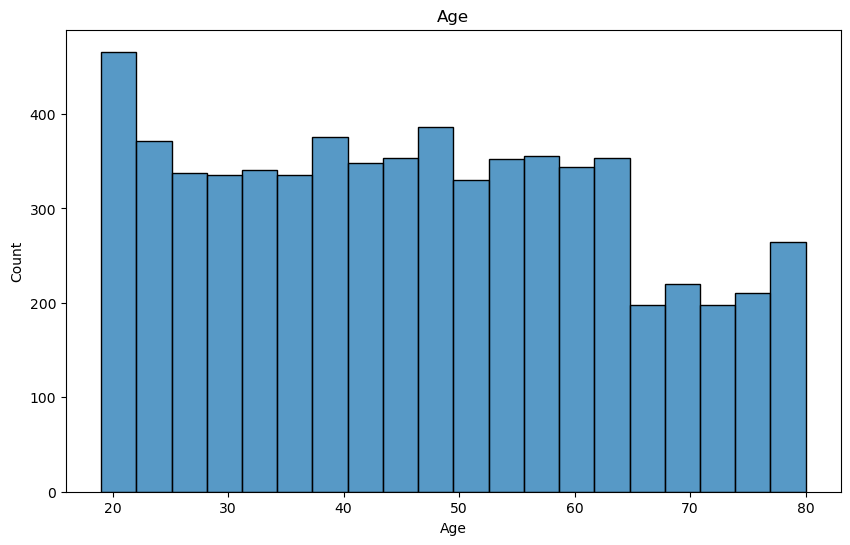

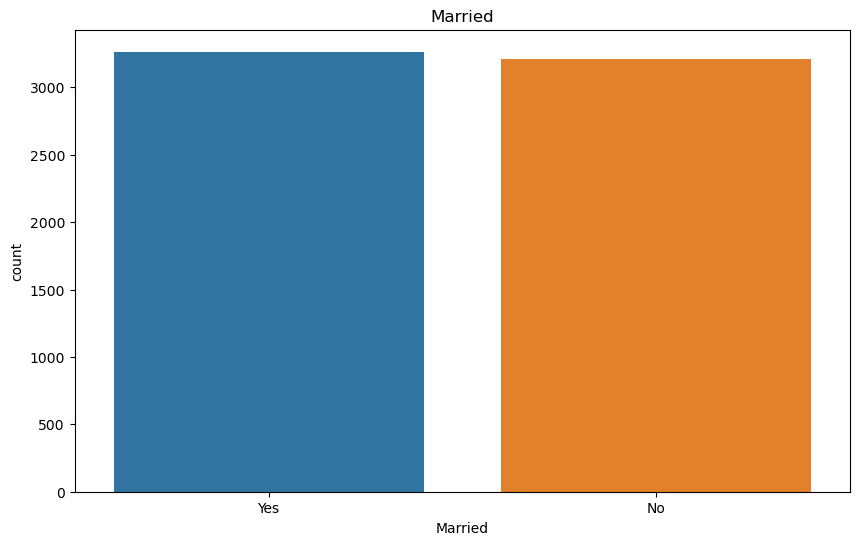

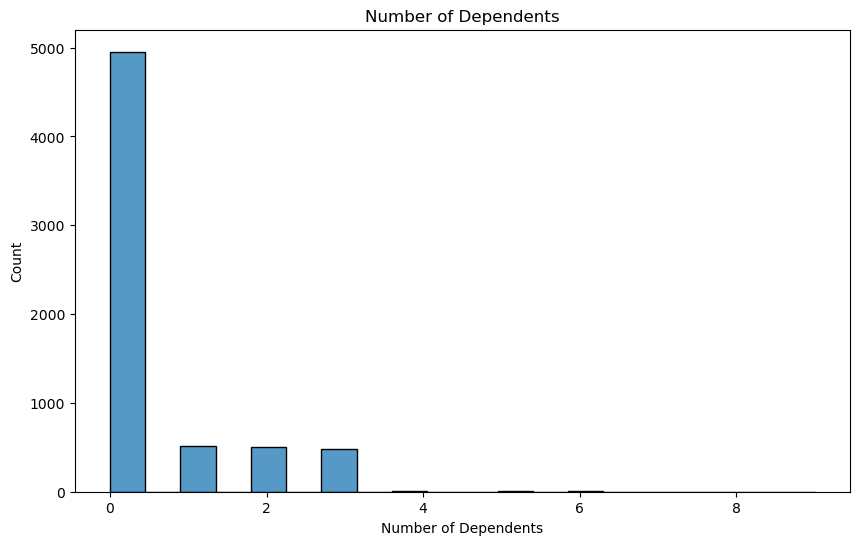

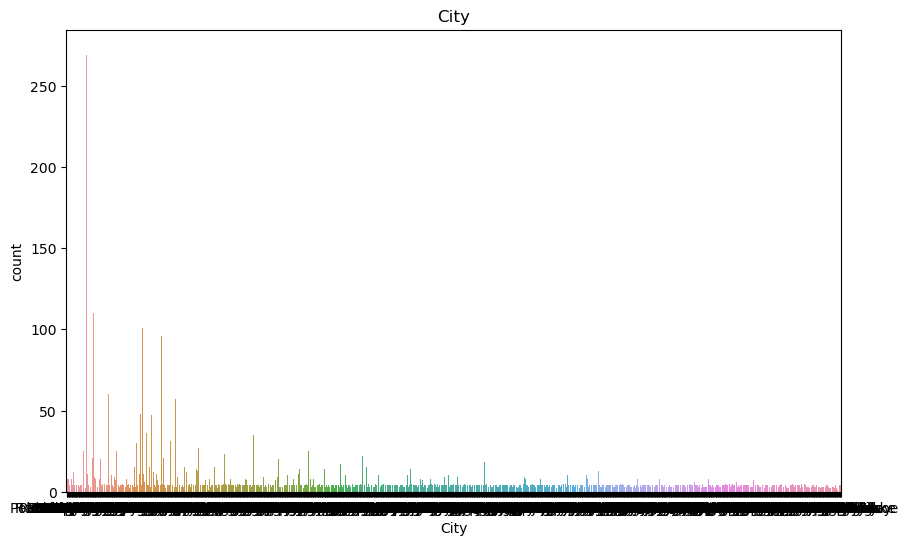

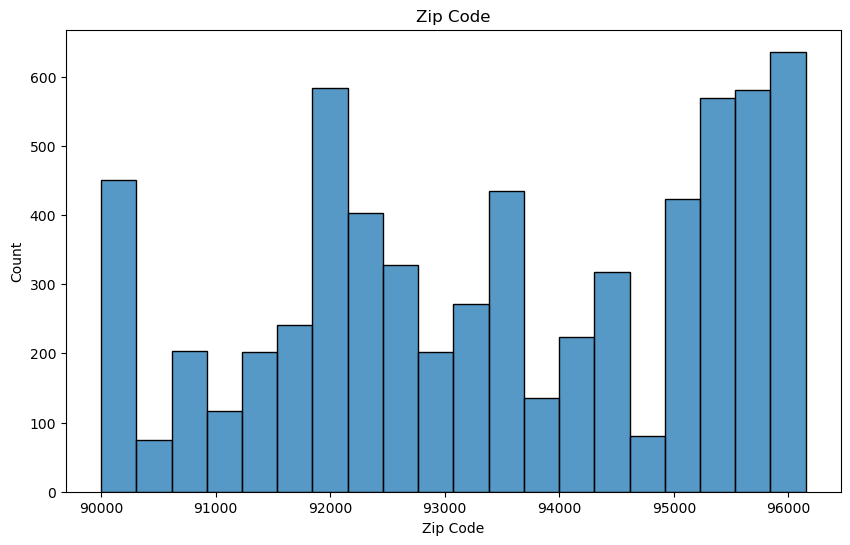

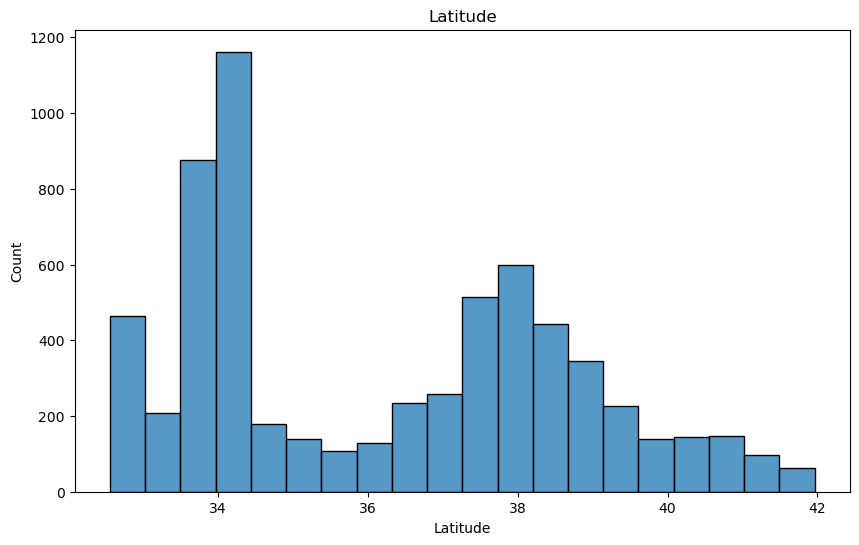

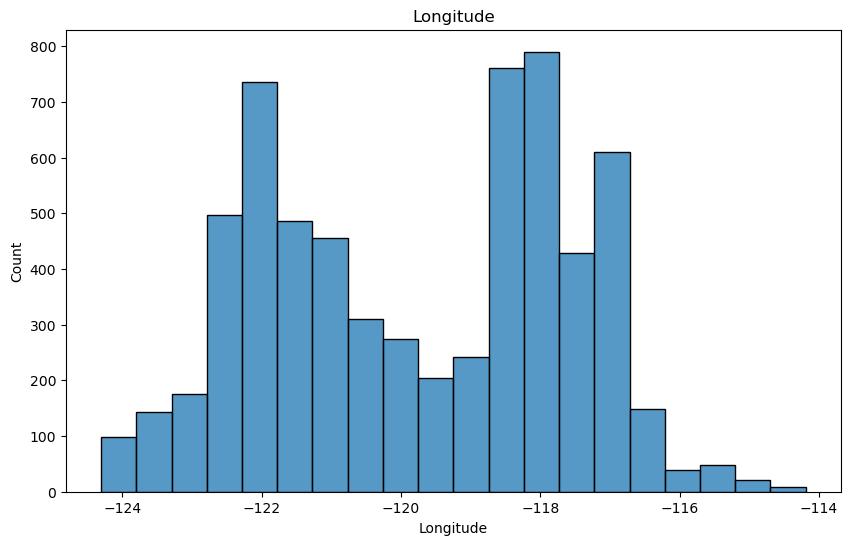

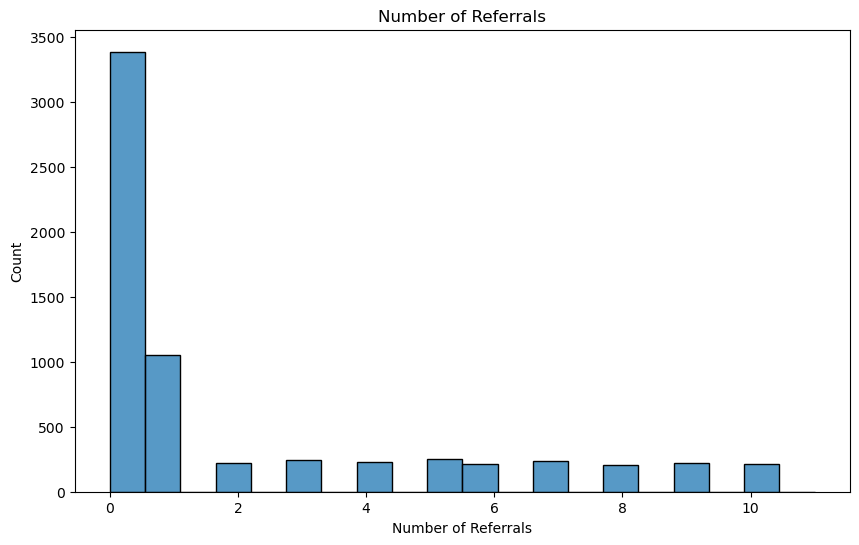

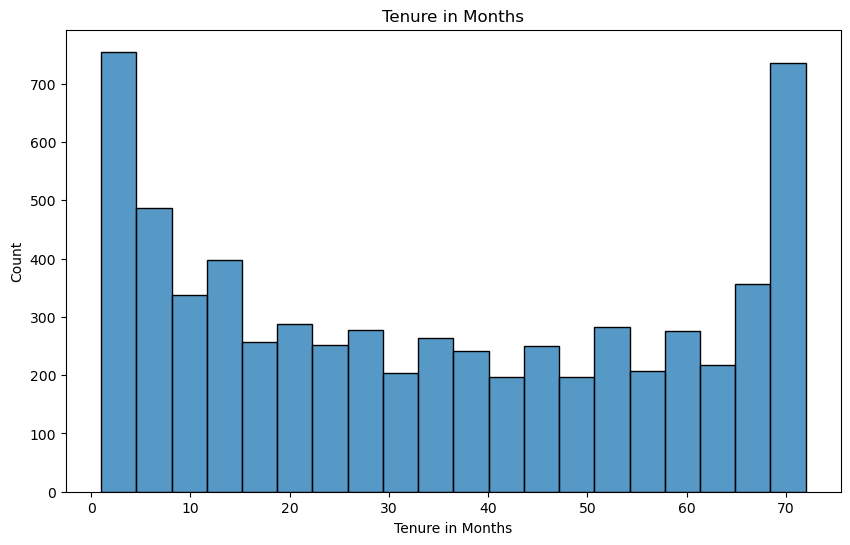

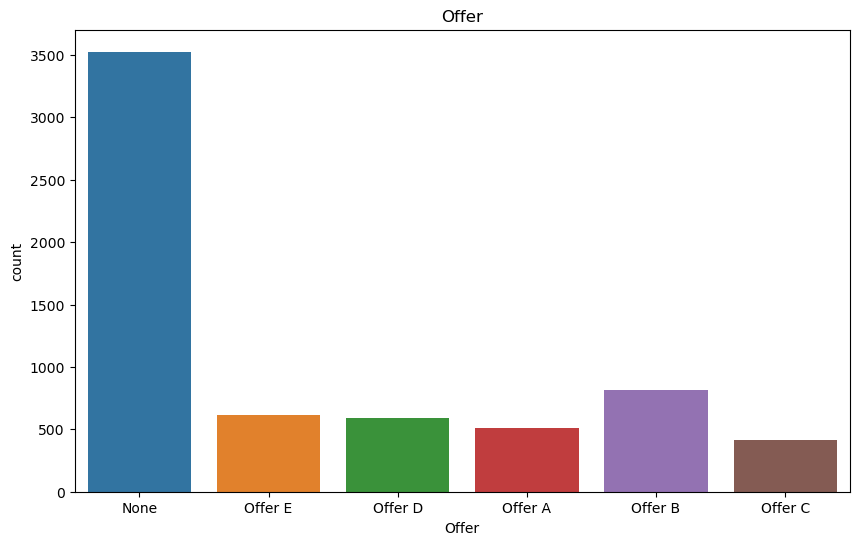

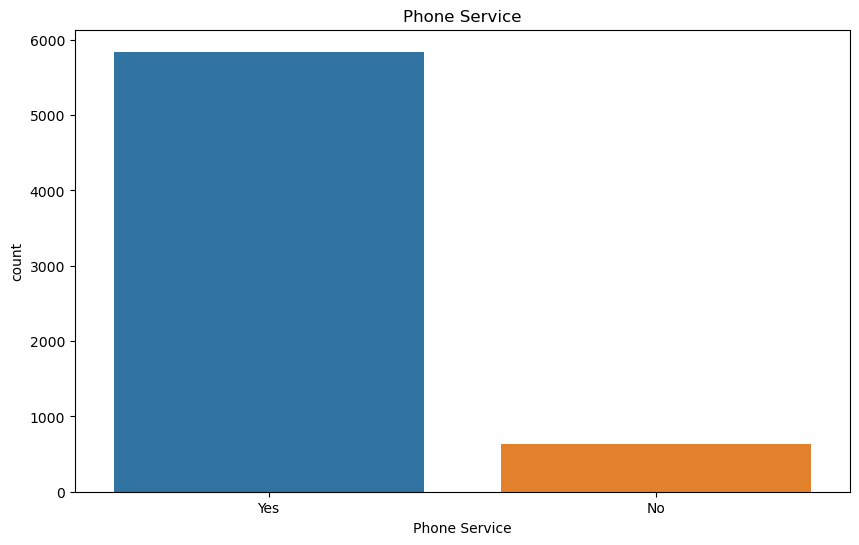

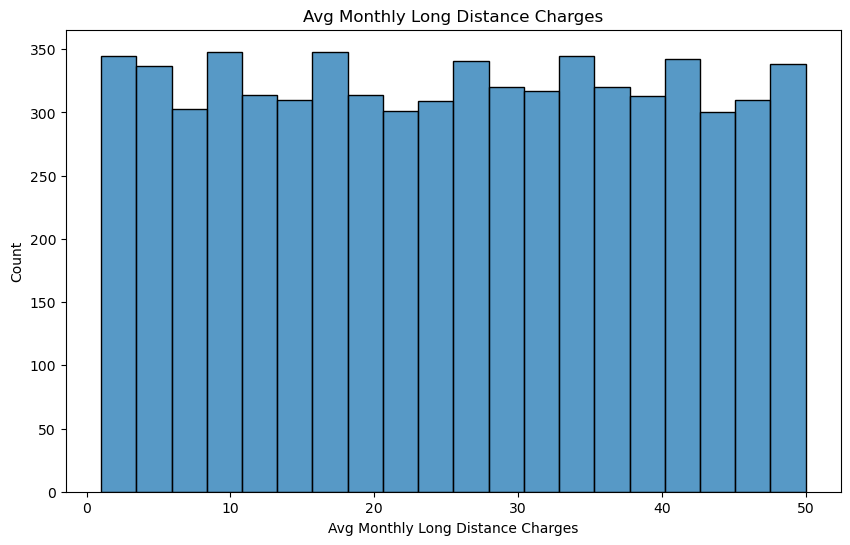

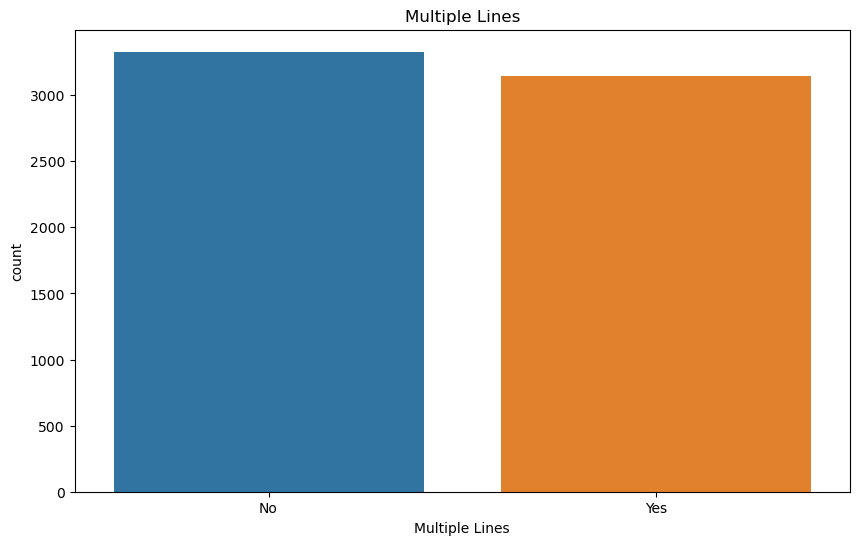

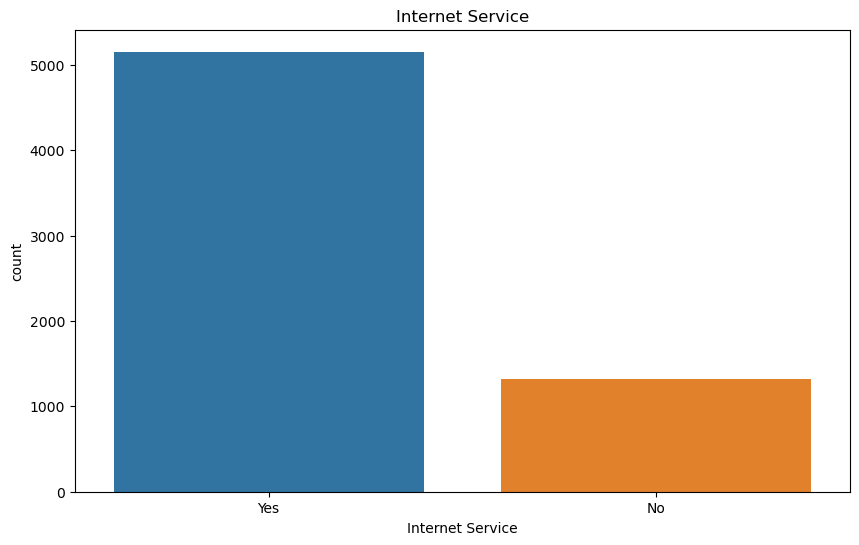

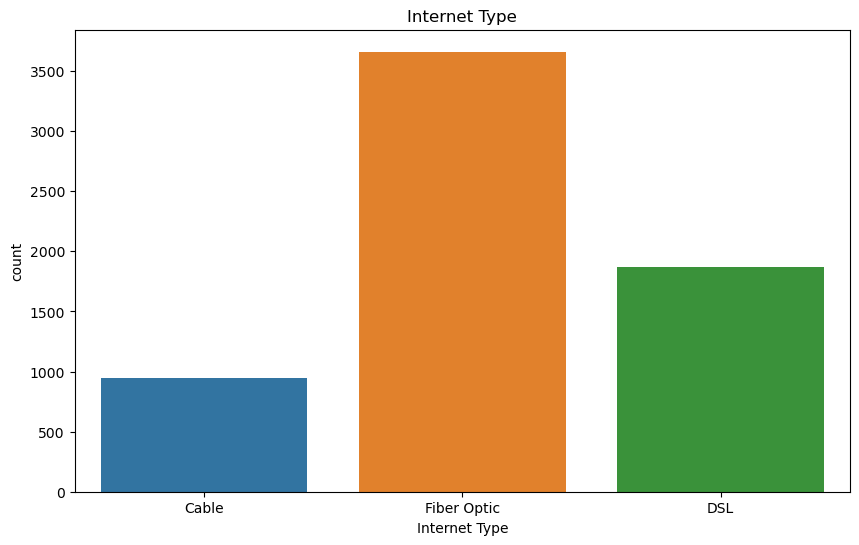

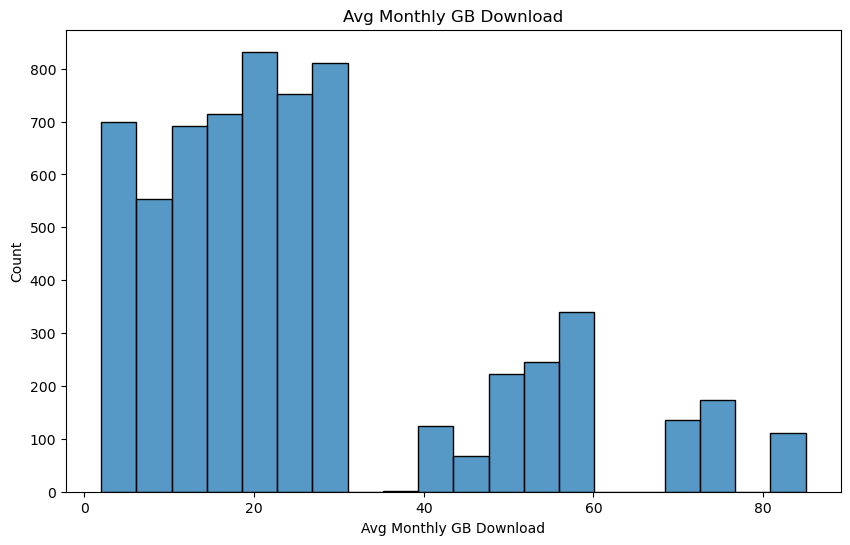

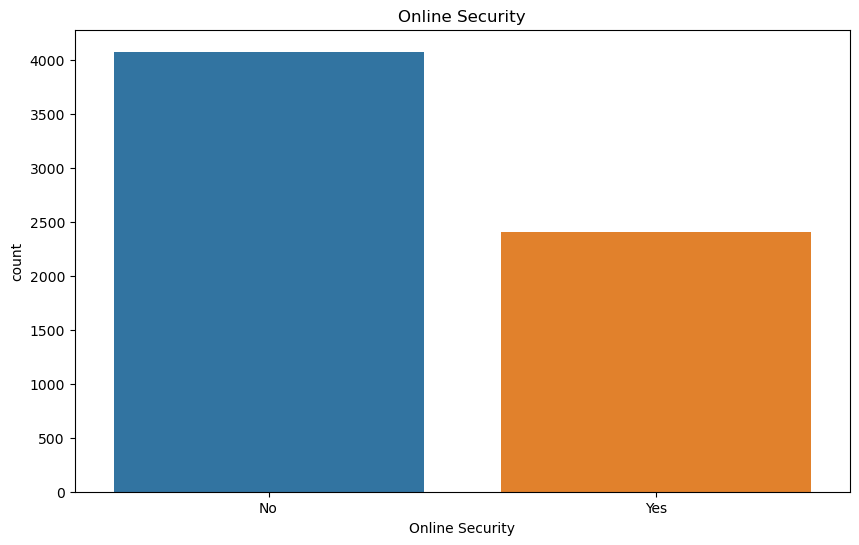

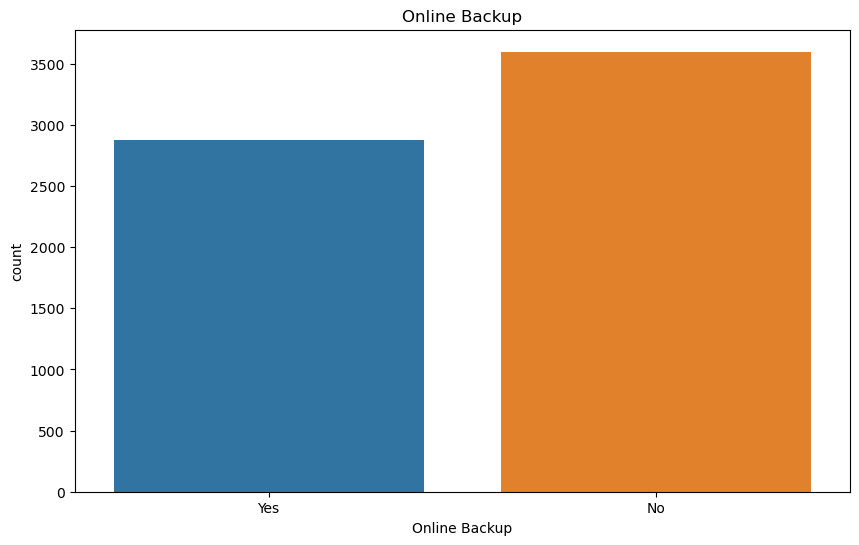

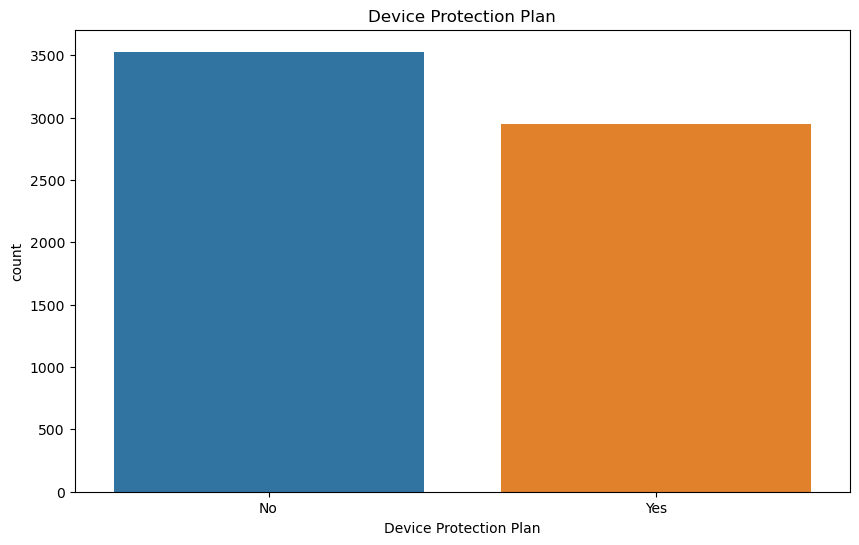

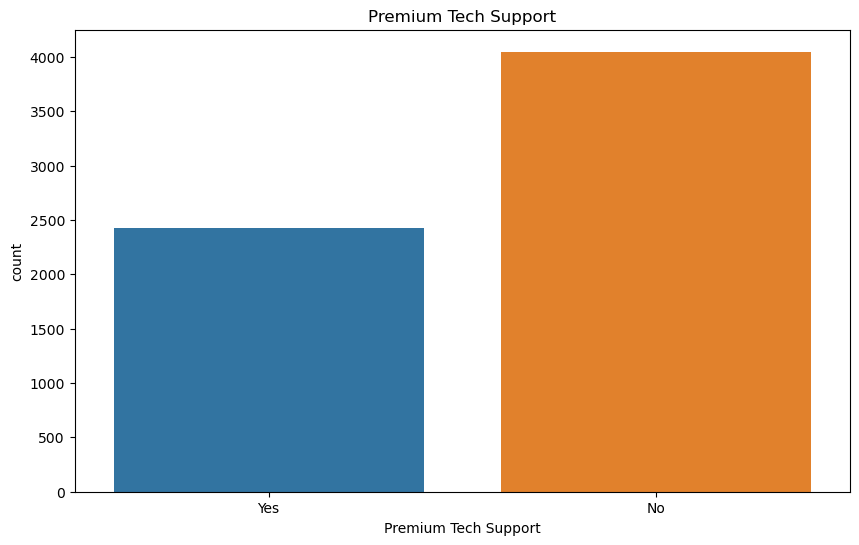

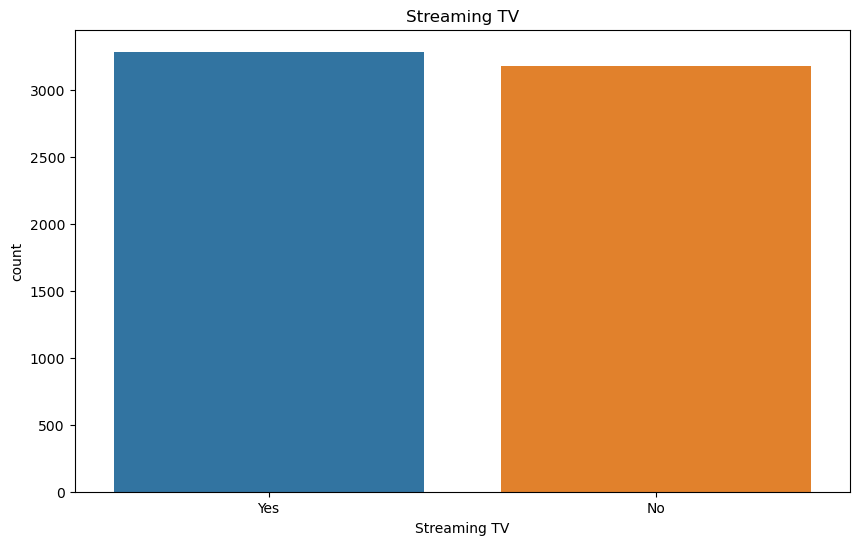

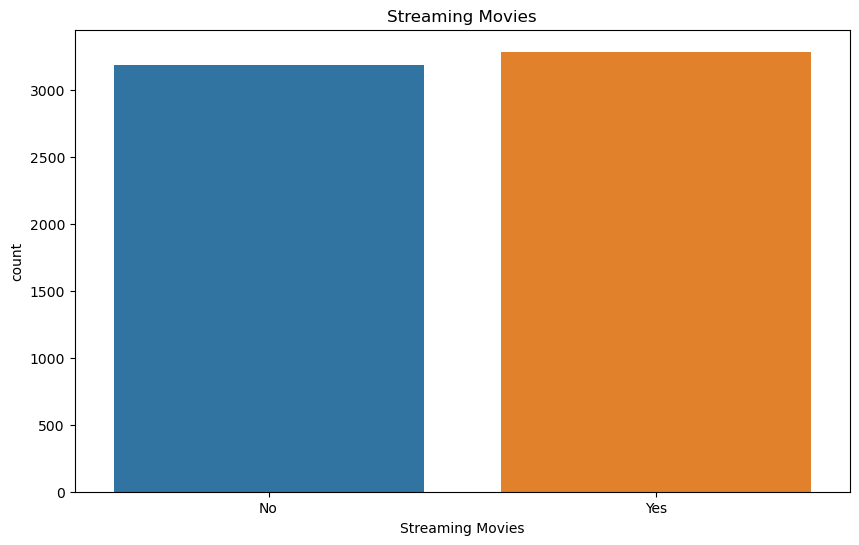

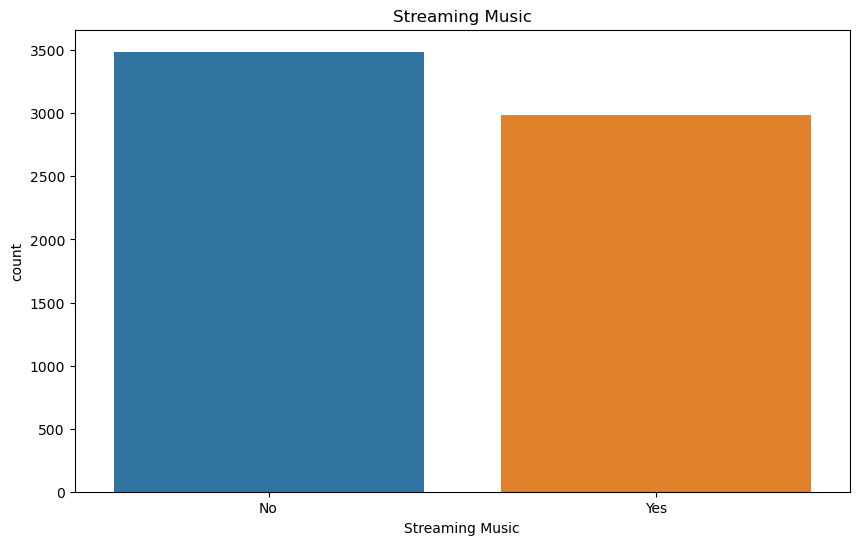

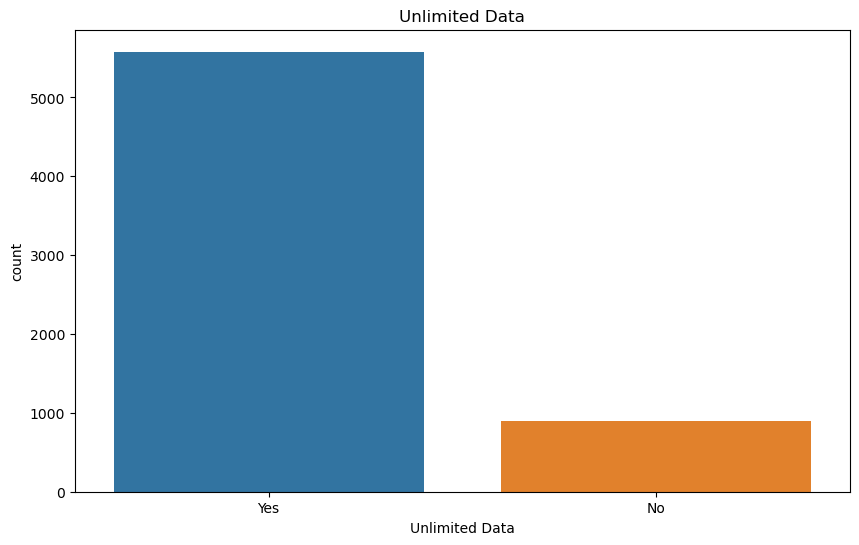

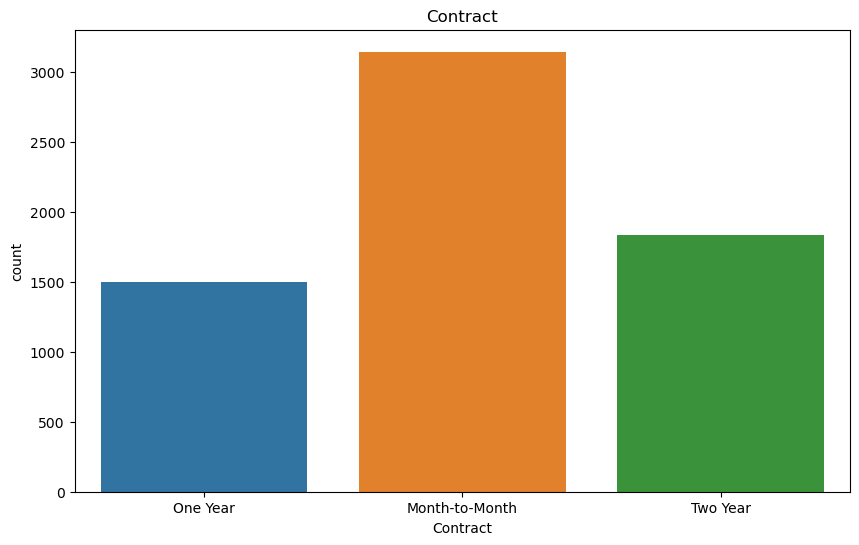

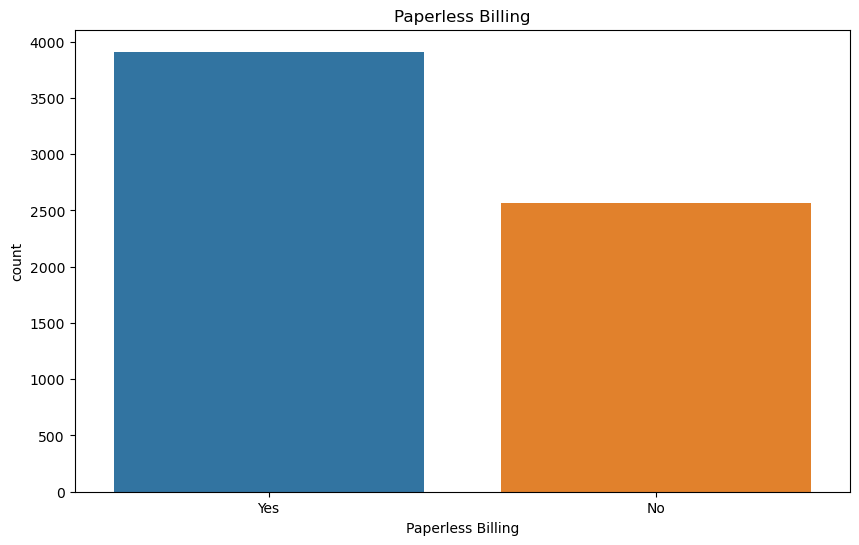

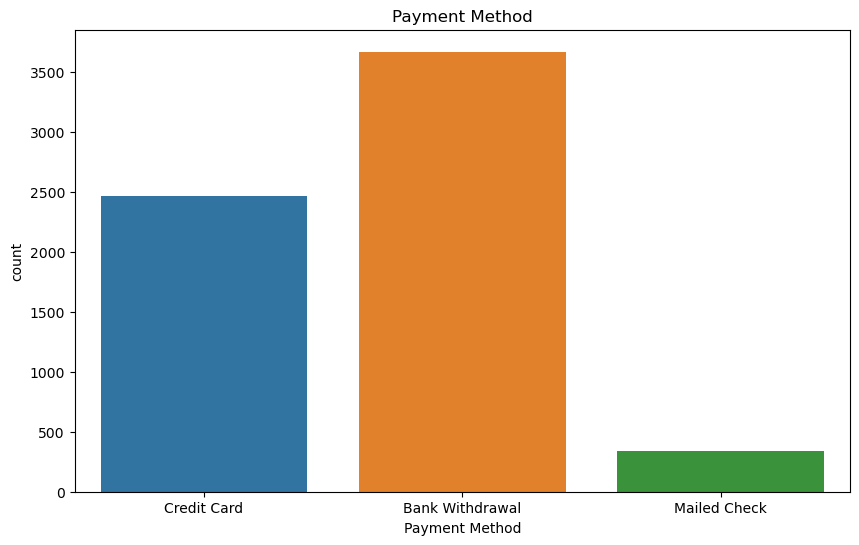

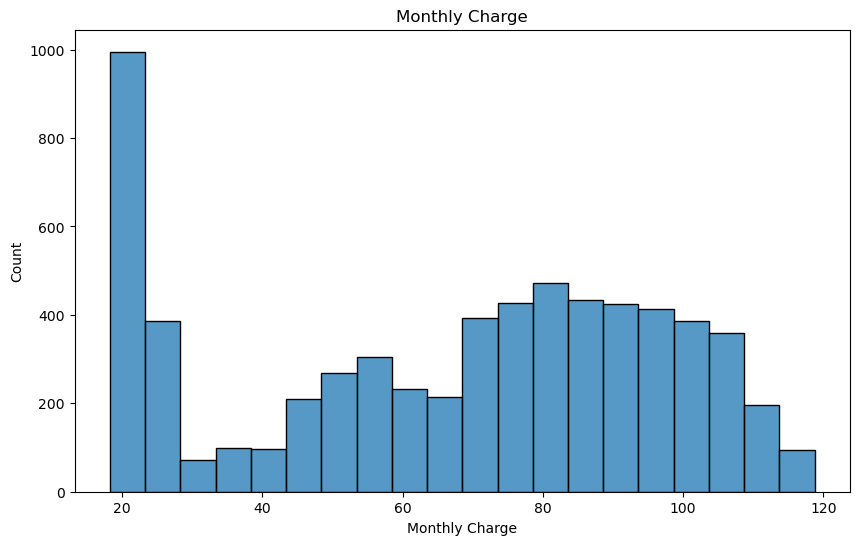

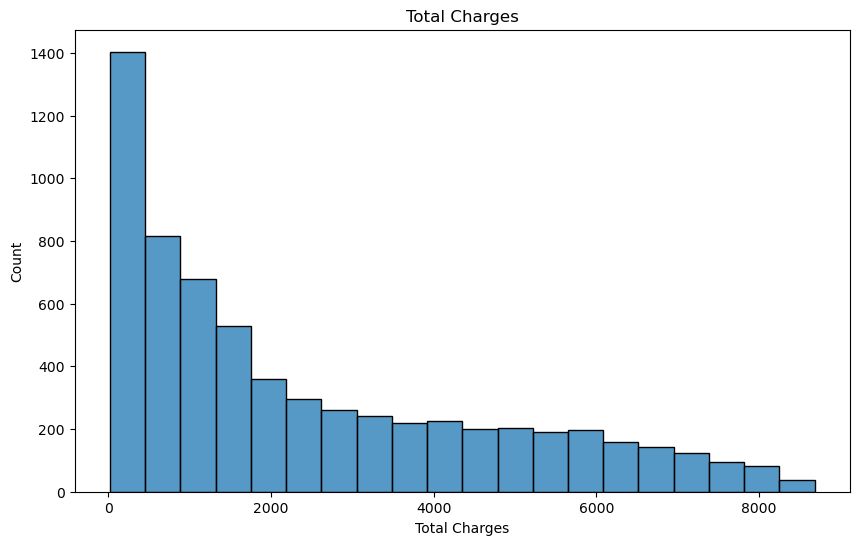

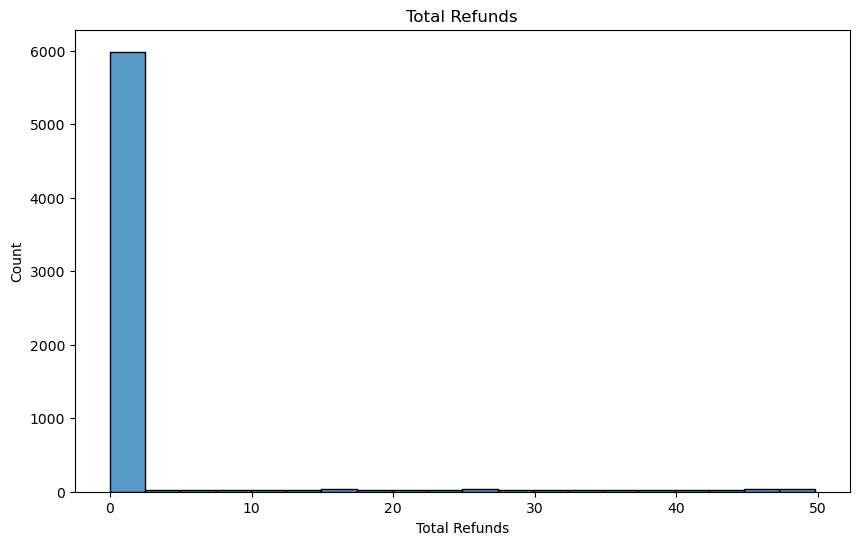

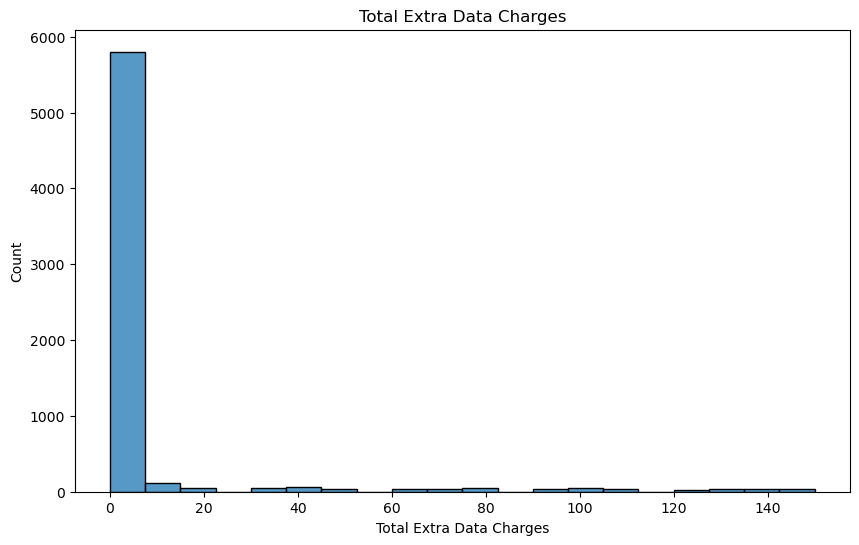

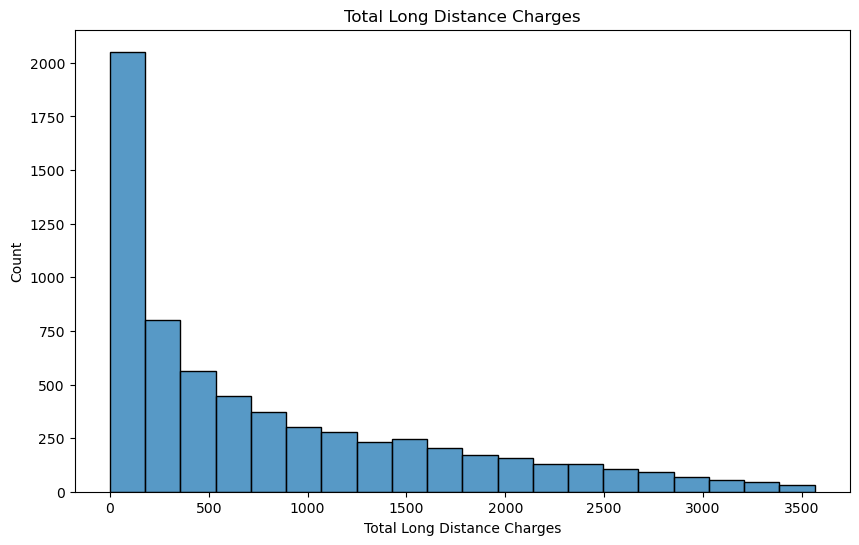

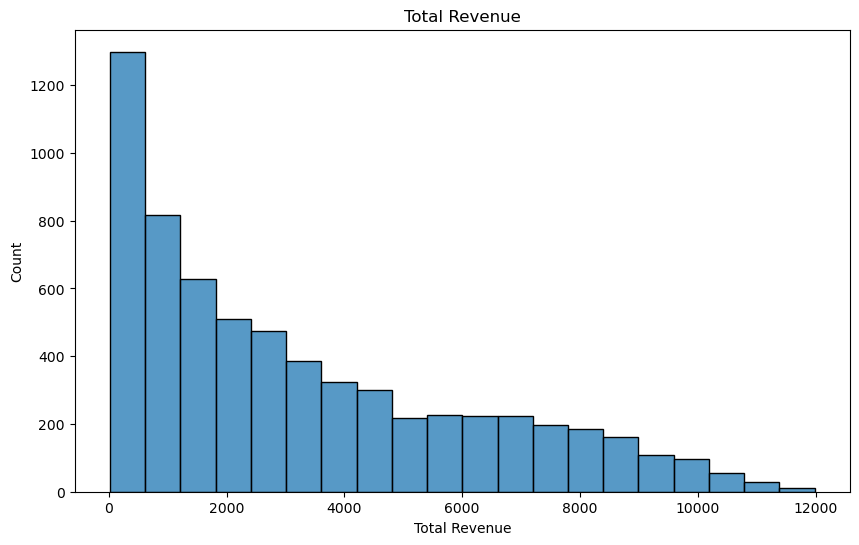

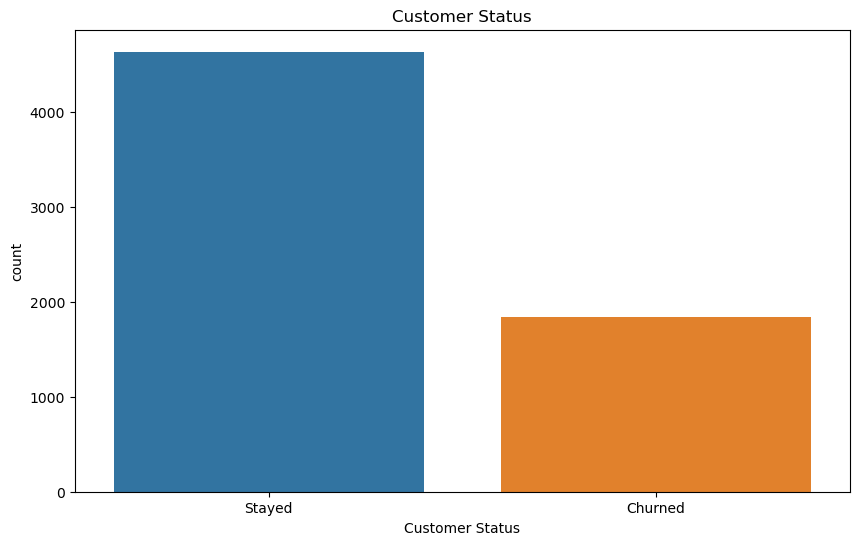

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# loop through all columns in the dataframe
for col in df.columns:
    # check the data type of the column
    dtype = df[col].dtype
    if dtype == 'object':
        # if the column is categorical, create a countplot
        plt.figure(figsize=(10,6))
        sns.countplot(x=col, data=df)
        plt.title(col)
        plt.show()
    elif dtype == 'int64' or dtype == 'float64':
        # if the column is numerical, create a histogram
        plt.figure(figsize=(10,6))
        sns.histplot(df[col], kde=False, bins=20)
        plt.title(col)
        plt.show()

In [24]:
import plotly.graph_objs as go

# create a scatter mapbox trace with the latitude and longitude columns
trace = go.Scattermapbox(
    lat=df['Latitude'],
    lon=df['Longitude'],
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        opacity=0.7
    )
)

# create a layout for the map
layout = go.Layout(
    mapbox=dict(
        accesstoken='your_mapbox_access_token',
        center=dict(
            lat=df['Latitude'].iloc[0],
            lon=df['Longitude'].iloc[0]
        ),
        zoom=10
    ),
)

# create a figure with the trace and layout
fig = go.Figure(data=trace, layout=layout)

# display the figure
fig.show()

In [25]:
df.head(1)

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,One Year,Yes,Credit Card,65.6,593.3,0.0,0,381.51,974.81,Stayed


In [26]:
df['Customer Status'].value_counts()

Stayed     4636
Churned    1839
Name: Customer Status, dtype: int64

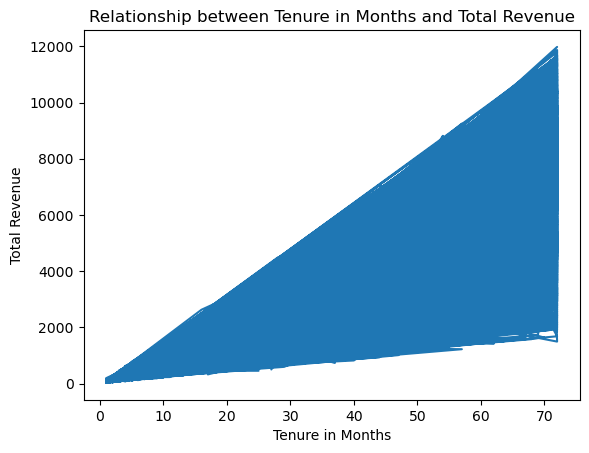

In [27]:
import matplotlib.pyplot as plt

plt.plot(df['Tenure in Months'], df['Total Revenue'])
plt.xlabel('Tenure in Months')
plt.ylabel('Total Revenue')
plt.title('Relationship between Tenure in Months and Total Revenue')
plt.show()

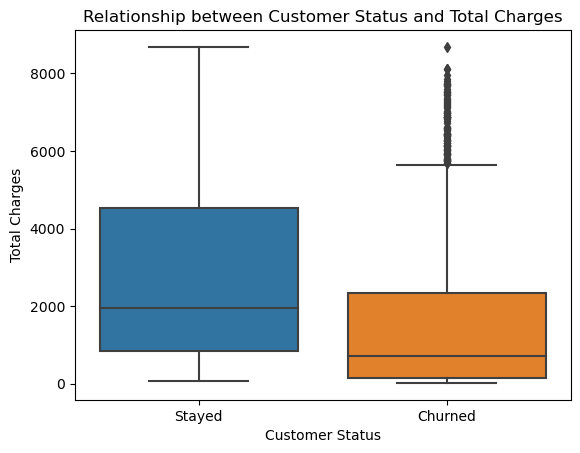

In [28]:
import seaborn as sns

sns.boxplot(x='Customer Status', y='Total Charges', data=df)
plt.xlabel('Customer Status')
plt.ylabel('Total Charges')
plt.title('Relationship between Customer Status and Total Charges')
plt.show()

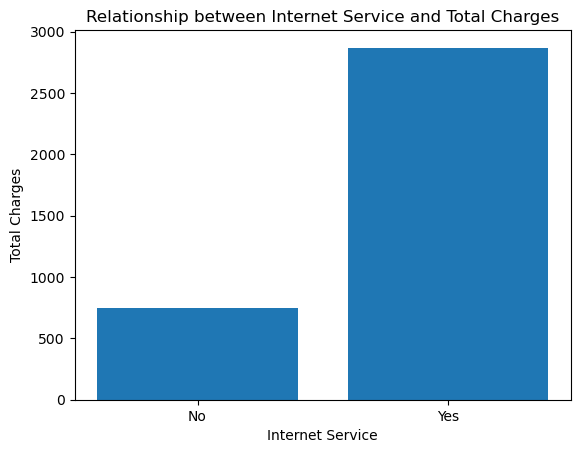

In [29]:
import matplotlib.pyplot as plt

# group the data by 'Internet Service' and calculate the mean of 'Total Charges'
data = df.groupby('Internet Service')['Total Charges'].mean()

# create a stacked bar chart
plt.bar(data.index, data)
plt.xlabel('Internet Service')
plt.ylabel('Total Charges')
plt.title('Relationship between Internet Service and Total Charges')
plt.show()

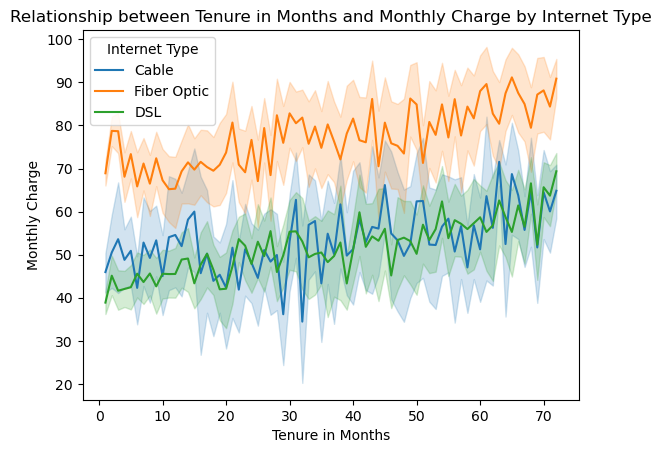

In [30]:
import seaborn as sns

sns.lineplot(x='Tenure in Months', y='Monthly Charge', hue='Internet Type', data=df)
plt.xlabel('Tenure in Months')
plt.ylabel('Monthly Charge')
plt.title('Relationship between Tenure in Months and Monthly Charge by Internet Type')
plt.show()

In [31]:
import plotly.express as px

fig = px.area(df, x='Tenure in Months', y='Total Revenue', color='Internet Type', 
              line_group='Internet Type', hover_name='Internet Type', 
              title='Relationship between Tenure in Months and Total Revenue by Internet Type')

fig.update_layout(xaxis_title='Tenure in Months', yaxis_title='Total Revenue')

fig.show()

In [32]:
import plotly.express as px

fig = px.scatter(df, x='Monthly Charge', y='Total Revenue', size='Tenure in Months', color='Tenure in Months',
                 title='Relationship between Monthly Charge and Total Revenue by Tenure in Months')

fig.update_layout(xaxis_title='Monthly Charge', yaxis_title='Total Revenue')

fig.show()

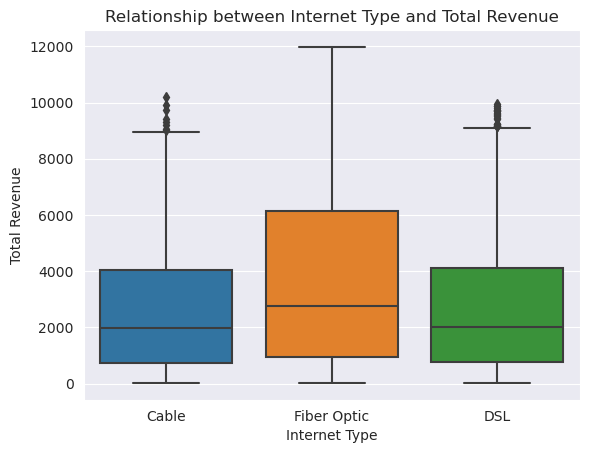

In [33]:
import seaborn as sns

sns.set_style('darkgrid')

sns.boxplot(x='Internet Type', y='Total Revenue', data=df)

plt.xlabel('Internet Type')
plt.ylabel('Total Revenue')
plt.title('Relationship between Internet Type and Total Revenue')

plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Gender','Married','City','Contract','Paperless Billing','Customer Status',
                    'Offer','Phone Service','Multiple Lines','Internet Service', 'Internet Type',
                    'Online Security', 'Online Backup', 'Device Protection Plan', 
                    'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 
                    'Unlimited Data','Payment Method']

label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

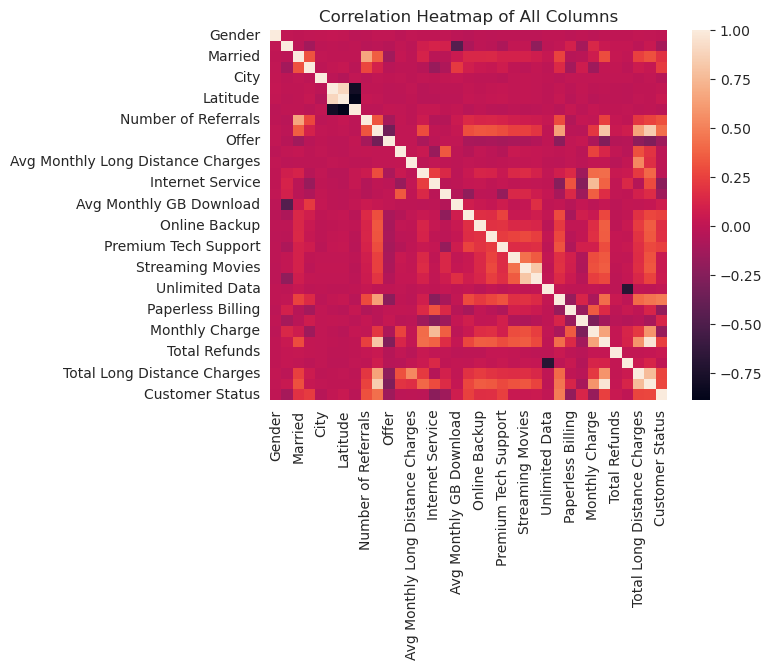

In [35]:
import seaborn as sns

sns.set_style('darkgrid')

sns.heatmap(df.corr())

plt.title('Correlation Heatmap of All Columns')

plt.show()

In [36]:
df.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status'],
      dtype='object')

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [38]:
X=df[['Married', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Contract', 'Paperless Billing', 'Total Charges',
       'Total Long Distance Charges', 'Total Revenue']]
y=df['Customer Status']

In [39]:
X.shape,y.shape

((6475, 15), (6475,))

In [40]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
# Normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [44]:
y_train_res.value_counts(),

(1    3466
 0    3466
 Name: Customer Status, dtype: int64,)

In [45]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_res, y_train_res)
knn_pred = knn.predict(X_test)

In [46]:

# Print the classification reports for both models
print('KNN Classification Report:')
print(classification_report(y_test, knn_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.86      0.66       449
           1       0.93      0.71      0.80      1170

    accuracy                           0.75      1619
   macro avg       0.73      0.79      0.73      1619
weighted avg       0.82      0.75      0.76      1619



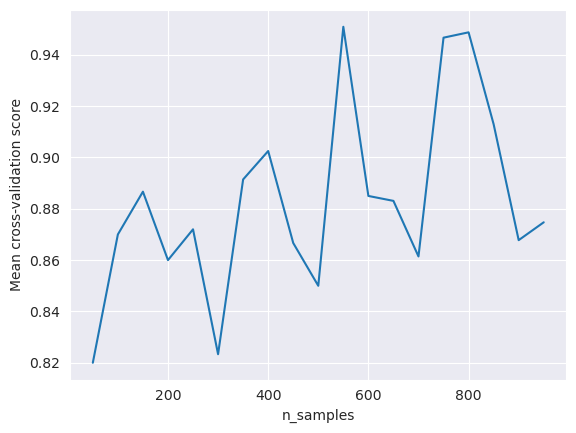

In [49]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Define a range of values for n_samples
n_samples_range = range(50, 1000, 50)

# Initialize an empty list to store the mean cross-validation scores for each value of n_samples
mean_scores = []

# Loop over the values of n_samples and compute the mean cross-validation score for each value
for n_samples in n_samples_range:
    # Generate a random binary classification dataset with n_samples
    X, y = make_classification(n_samples=n_samples, n_features=15, n_informative=3, n_redundant=0, random_state=42)
    
    # Create a KNN classifier with k=5
    knn = KNeighborsClassifier(n_neighbors=17)

    # Perform 10-fold cross-validation
    scores = cross_val_score(knn, X, y, cv=10)

    # Compute the mean cross-validation score
    mean_scores.append(scores.mean())

# Plot the mean cross-validation scores as a function of n_samples
plt.plot(n_samples_range, mean_scores)
plt.xlabel('n_samples')
plt.ylabel('Mean cross-validation score')
plt.show()

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=150, n_features=15, n_informative=3, n_redundant=0, random_state=42)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=17)

# Perform 10-fold cross-validation
scores = cross_val_score(knn, X, y, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean cross-validation score:", scores.mean())
print("Standard deviation of cross-validation scores:", scores.std())

Cross-validation scores: [0.73333333 0.8        0.93333333 1.         0.8        0.93333333
 0.93333333 0.93333333 0.8        1.        ]
Mean cross-validation score: 0.8866666666666667
Standard deviation of cross-validation scores: 0.0896908269804914


# Save Model

In [53]:
import pickle
import os

# train and fit your model
model = knn 

# create a directory to store the model
if not os.path.exists('Desktop'):
    os.makedirs('Desktop')

# save the model to a file in the models directory
filename = 'models/modeltelecom.pkl'
pickle.dump(model, open(filename, 'wb'))

# Thanks